# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

from nltk.util import bigrams

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from get_labeled_dfs import *
from process_text import *


In [2]:
# use custom function to get the corpus df, label dfs, and validation dfs
corpus_df, val_corpus_df, emotion_df, val_emotion_df, valence_df, val_valence_df = get_labeled_dfs()


In [3]:
# use custom class method to process data
processor = Process_Text_Data()
processor.transform(corpus_df)


In [4]:
corpus_df.head()


,text
0,test predict breast cancer relapse approve
1,two hussein ally hang iraqi official say
2,sight sound ces
3,schuey see ferrari unveil new car
4,closing cancellation top advice flu outbreak


In [5]:
valence_df.head()


,valence,label
0,32,1
1,-48,0
2,26,1
3,40,1
4,-6,2


In [6]:
emotion_df.head()


,anger,disgust,fear,joy,sadness,surprise,max,label
0,0,0,15,38,9,11,joy,3
1,24,26,16,13,38,5,sadness,4
2,0,0,0,17,0,4,joy,3
3,0,0,0,46,0,31,joy,3
4,1,0,23,8,11,8,fear,2


# Exploratory Data Analysis

## Label Distributions 

Text(0.5, 1.0, 'Number of Headlines per Valence Category')

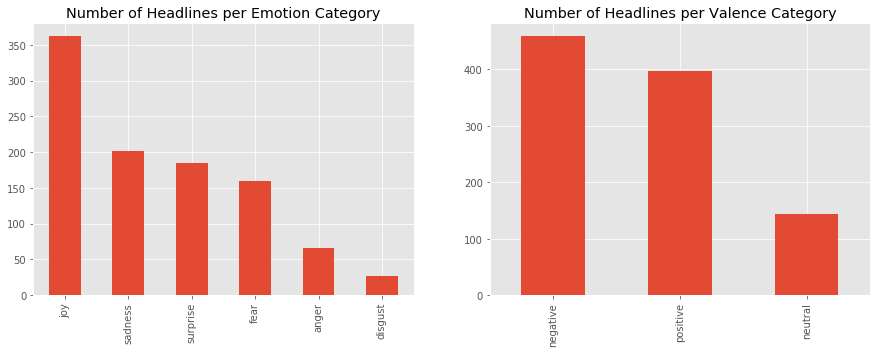

In [7]:
# bar charts showing a count of each category

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
emotion_df['max'].value_counts().plot(kind='bar')
plt.title("Number of Headlines per Emotion Category")

plt.subplot(1,2,2)
valence_df['label'].value_counts().plot(kind='bar')
plt.xticks([0,1,2], ["negative", "positive", "neutral"])
plt.title("Number of Headlines per Valence Category")


## Label Correlations

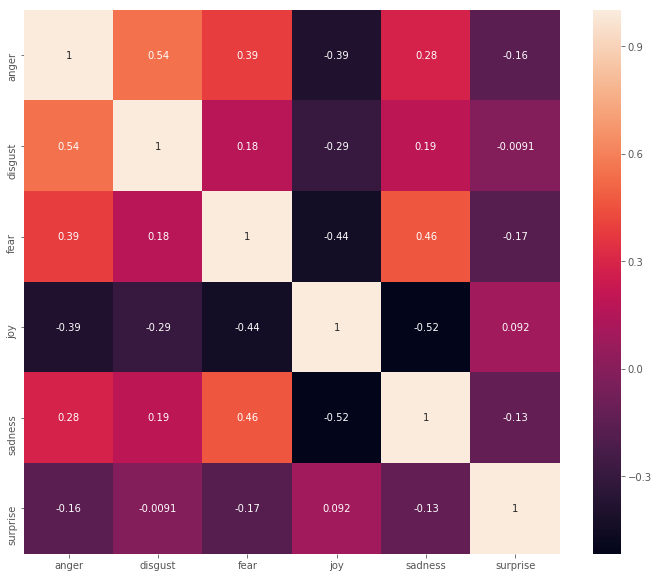

In [8]:
# correlations among emotion categories
plt.figure(figsize=(12,10))
corr = emotion_df.iloc[:,:-1].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

## Intensity Distributions

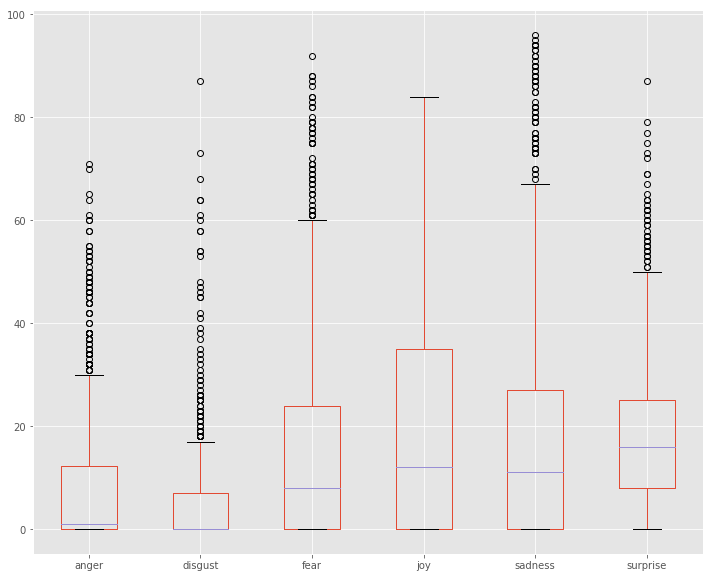

In [9]:
# boxplot showing the disribution of intensity scores for each emotion category
plt.figure(figsize=(12,10))
emotion_df.iloc[:,:-1].boxplot()

In [10]:
# note that there there are no rows with rating 0 for all emotion categories, 
emotion_df.loc[(emotion_df.anger==0)&(emotion_df.disgust==0)&(emotion_df.fear==0)&(emotion_df.joy==0)&(emotion_df.sadness==0)& (emotion_df.surprise==0)]

,anger,disgust,fear,joy,sadness,surprise,max,label


([<matplotlib.axis.XTick at 0x1a26924cc0>],
 <a list of 1 Text xticklabel objects>)

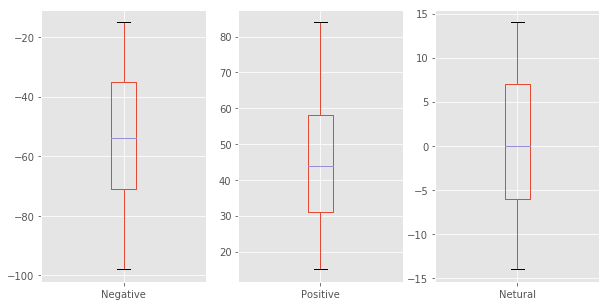

In [11]:
# boxplot showing the disribution of valencescores 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
valence_df.loc[valence_df['label']==0]['valence'].plot(kind='box')
plt.xticks([1], labels=["Negative"])
plt.subplot(1,3,2)
valence_df.loc[valence_df['label']==1]['valence'].plot(kind='box')
plt.xticks([1], labels=["Positive"])
plt.subplot(1,3,3)
valence_df.loc[valence_df['label']==2]['valence'].plot(kind='box')
plt.xticks([1], labels=["Netural"])


In [12]:
# note that there there are a few rows with rating 0 for valence, 
valence_df.loc[(valence_df.valence==0)]

,valence,label
200,0,2
280,0,2
308,0,2
555,0,2
608,0,2
686,0,2


## Word Frequencies

### Corpus Top Words

In [13]:
# make a dictionary with words as keys and word counts as values
word_count_dict = {}

voc = set()
for row in corpus_df['text']:
    for word in row.split():
        voc.add(word)
        
for word in voc:
    word_count_dict[word]=0
    
for row in corpus_df['text']:
    for word in row.split():
        word_count_dict[word]+=1
        
# make a df of word counts        
word_count_df = pd.DataFrame({"word": [key for key in word_count_dict.keys()], "count": [val for val in word_count_dict.values()]})
word_count_df.sort_values('count', ascending=False, inplace=True)

Text(0.5, 1.0, 'Most Frequently Used Words')

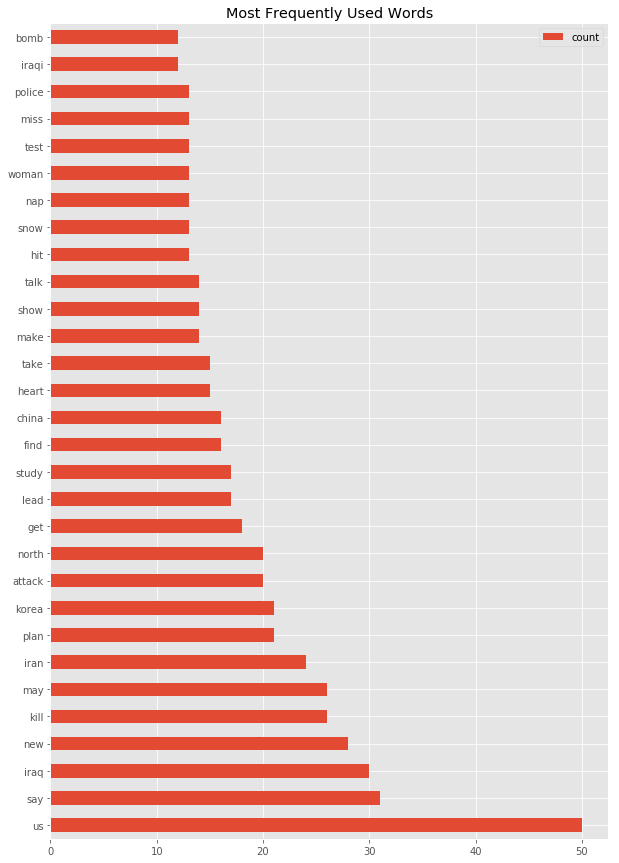

In [14]:
# plot the 30 most used words in the corpus
word_count_df[:30].plot(kind='barh', figsize=(10,15))
labels = [i for i in word_count_df[:30]['word']]
plt.yticks(ticks = range(30), labels = labels)
plt.title("Most Frequently Used Words")


### Corpus Top Bigrams

In [15]:
bigram_count_dict = {}

bigrams_set = set()
for row in corpus_df['text']:
    for bigram in list(bigrams(row.split())):
        bigrams_set.add(bigram)
        
        
for bigram in bigrams_set:
    bigram_count_dict[bigram]=0
    
for row in corpus_df['text']:
    for bigram in list(bigrams(row.split())):
        bigram_count_dict[bigram]+=1
        
# make a df of bigram counts        
bigram_count_df = pd.DataFrame({"bigram": [key for key in bigram_count_dict.keys()], "count": [val for val in bigram_count_dict.values()]})
bigram_count_df.sort_values('count', ascending=False, inplace=True)

Text(0.5, 1.0, 'Most Frequently Used Bigrams')

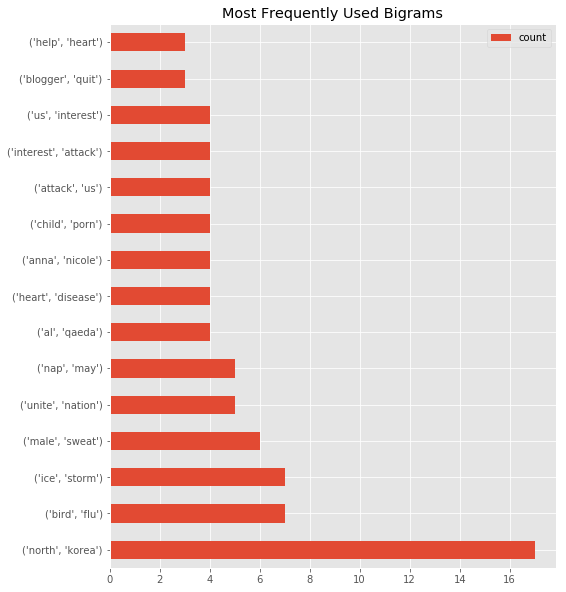

In [20]:
bigram_count_df[:15].plot(kind='barh', figsize=(8,10))
labels = [i for i in bigram_count_df[:15]['bigram']]
plt.yticks(ticks = range(15), labels = labels)
plt.title("Most Frequently Used Bigrams")

### Top Words Per Emotion Label

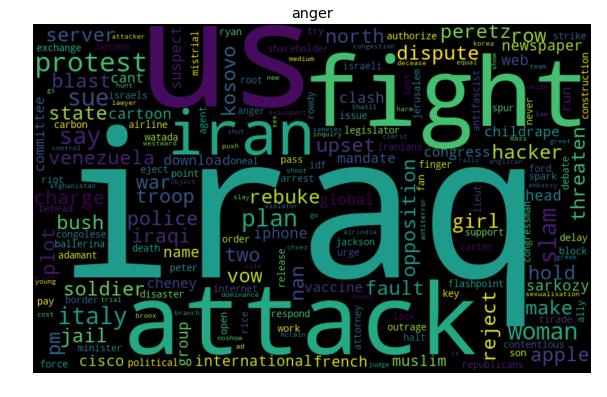

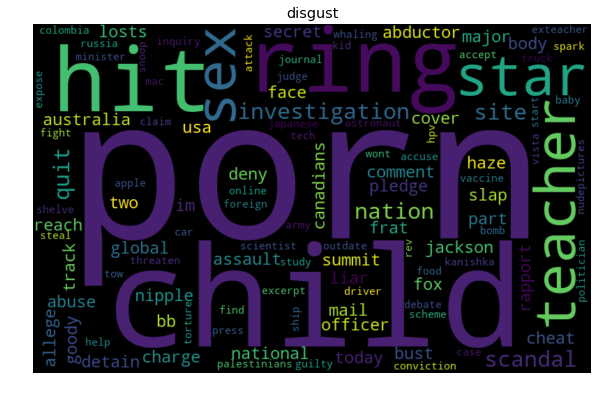

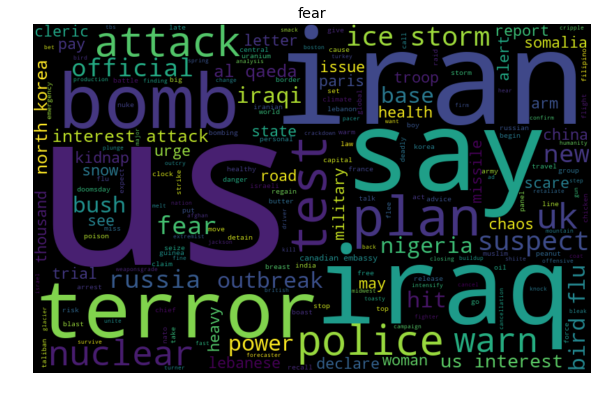

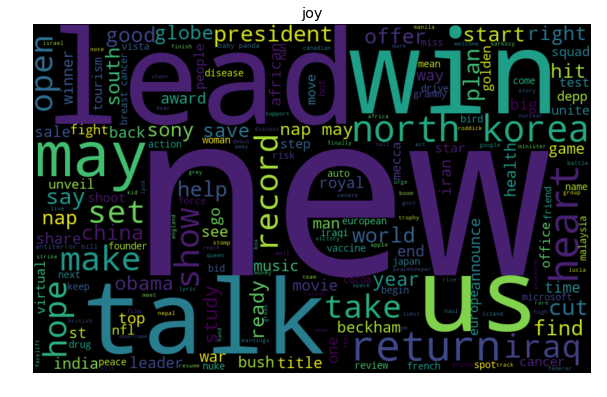

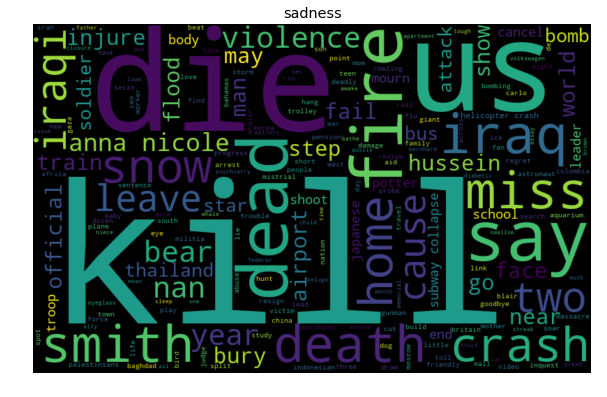

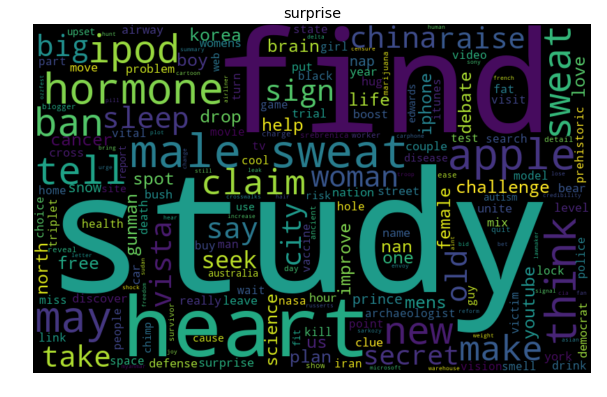

In [26]:
for i in list(emotion_df.columns[0:-2]):
    
    indexes = []
    for index, val in enumerate(emotion_df['max']):
        if val==i:
            indexes.append(index)
    
    single_emotion = corpus_df['text'][indexes] 
    word_string = ' '.join([str(i) for i in single_emotion])

    wordcloud = WordCloud(width=800, height=500, random_state=42).generate(word_string)
    plt.figure(figsize=(10, 7))
    plt.title(i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


### Top Words Per Valence Label

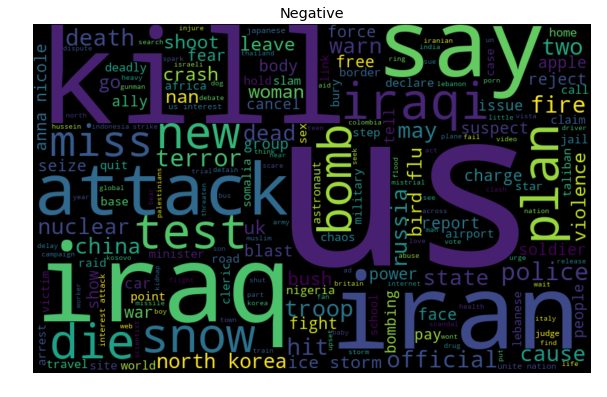

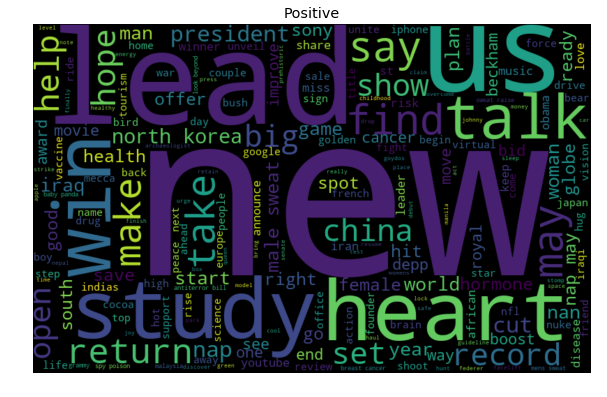

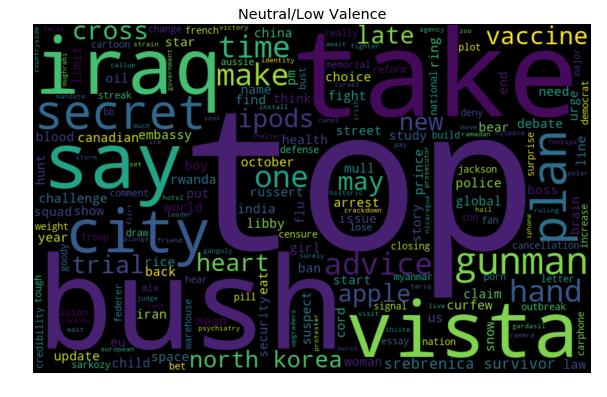

In [47]:
for i in [0,1,2]:
    
    indexes = []
    for index, val in enumerate(valence_df['label']):
        if val==i:
            indexes.append(index)
    
    single_valence = corpus_df['text'][indexes] 
    word_string = ' '.join([str(i) for i in single_valence])

    wordcloud = WordCloud(width=800, height=500, random_state=42).generate(word_string)
    plt.figure(figsize=(10, 7))
    
    if i==0:
        plt.title("Negative")
    elif i==1:
        plt.title("Positive")
    else:
        plt.title("Neutral/Low Valence")
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

## Length of Headlines

In [58]:
lengths = []
for i in corpus_df['text']:
    lengths.append(len(i.split()))
    
print("The average headline length is {0} words.".format(np.round(sum(lengths)/len(lengths), 2)))
print("The shortest headline length is {0} words.".format(min(lengths)))
print("The longest headline length is {0} words.".format(max(lengths)))

The average headline length is 5.08 words.
The shortest headline length is 2 words.
The longest headline length is 10 words.


## Presence of Emotion Words